<a href="https://colab.research.google.com/github/romenmeitei/STRING_Database_Analysis/blob/main/STRING_Database_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# Load the STRING network data
string_data = pd.read_csv("string_interactions.tsv", sep="\t")

# Rename columns to remove special characters
string_data.rename(columns={"#node1": "node1"}, inplace=True)

# Display the first few rows
print("First few rows of the STRING data:")
print(string_data.head())

# Extract key information: node1, node2, and combined_score
interactions = string_data[["node1", "node2", "combined_score"]]
print("\nProtein-Protein Interactions:")
print(interactions)


First few rows of the STRING data:
        node1       node2          node1_string_id          node2_string_id  \
0  AGQ12554.1        macB  1096995.BJAB07104_00183  1096995.BJAB07104_00590   
1  AGQ12667.1  AGQ12691.1  1096995.BJAB07104_00297  1096995.BJAB07104_00321   
2  AGQ12667.1      tolQ_2  1096995.BJAB07104_00297  1096995.BJAB07104_02153   
3  AGQ12688.1        thiC  1096995.BJAB07104_00318  1096995.BJAB07104_00317   
4  AGQ12688.1  AGQ14261.1  1096995.BJAB07104_00318  1096995.BJAB07104_01893   

   neighborhood_on_chromosome  gene_fusion  phylogenetic_cooccurrence  \
0                       0.095          0.0                      0.000   
1                       0.000          0.0                      0.415   
2                       0.000          0.0                      0.499   
3                       0.443          0.0                      0.000   
4                       0.064          0.0                      0.401   

   homology  coexpression  experimentally_determine

In [7]:
# Filter interactions with a high combined score
high_score_interactions = interactions[interactions["combined_score"] > 0.8]
print("\nHigh-Confidence Protein-Protein Interactions:")
print(high_score_interactions)



High-Confidence Protein-Protein Interactions:
          node1       node2  combined_score
11   AGQ12689.1  AGQ12690.1           0.871
13   AGQ12690.1  AGQ12689.1           0.871
43   AGQ12691.1        macB           0.826
44   AGQ12691.1  AGQ14282.1           0.863
45   AGQ12691.1  AGQ14281.1           0.892
..          ...         ...             ...
946        pstC        sphX           0.998
953        sdsA  AGQ15436.1           0.868
956        sphX        pstB           0.998
957        sphX        pstA           0.998
958        sphX        pstC           0.998

[220 rows x 3 columns]


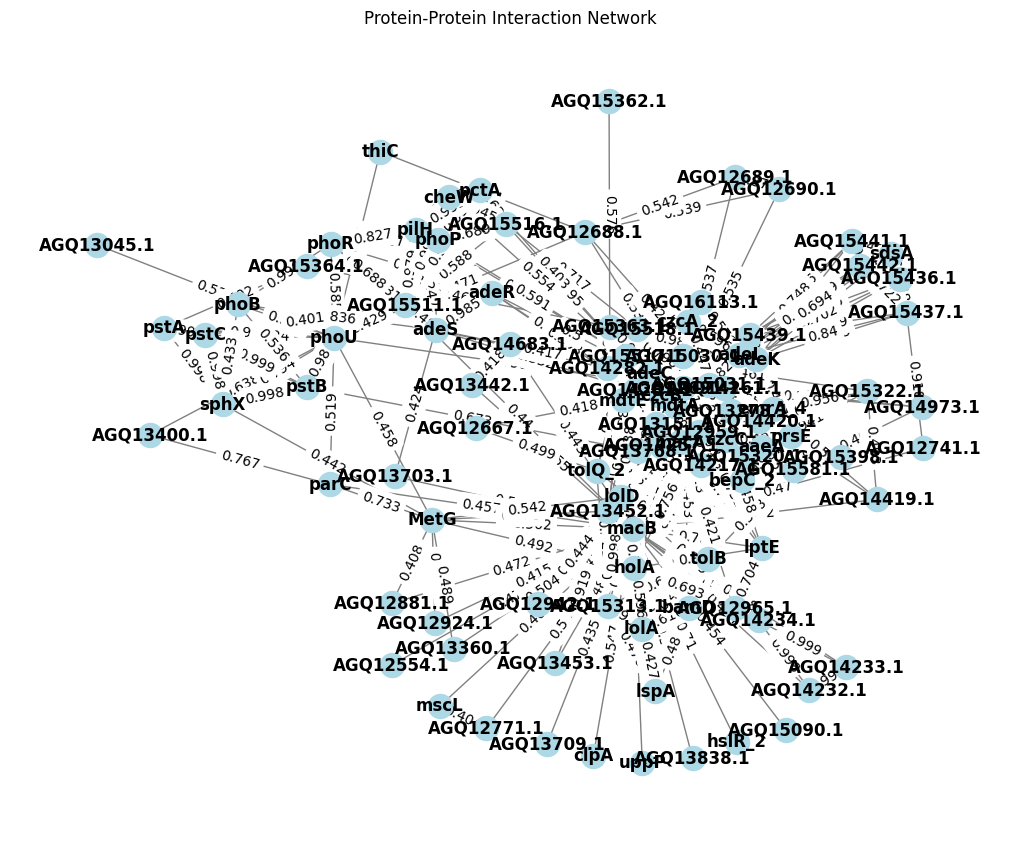

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the interactions
G = nx.from_pandas_edgelist(interactions, source='node1', target='node2', edge_attr='combined_score')

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'combined_score'))
plt.title("Protein-Protein Interaction Network")
plt.show()


In [9]:
# Save the filtered high-confidence interactions to a new file
high_score_interactions.to_csv("high_confidence_interactions.csv", index=False)


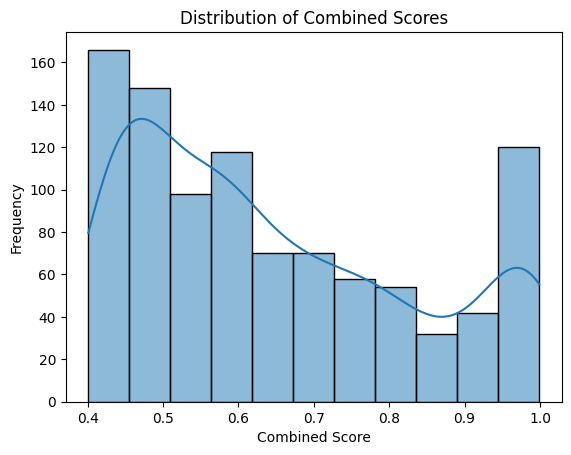

In [10]:
import seaborn as sns

# Plot a histogram of combined scores
sns.histplot(interactions['combined_score'], kde=True)
plt.title("Distribution of Combined Scores")
plt.xlabel("Combined Score")
plt.ylabel("Frequency")
plt.show()
